## problems we need to fix before final project: (coment from TA)
### major issue right now: not enough data
- #####Warning message:
“Too little data to stratify.
• Resampling will be unstratified.”
- ##### underfitting? (look at our accuracy vs k)

- ##### Identified NA values, but did not do anything to deal with them. For example, since so many NA values are within the numprob column, this column can be removed and thus all NA values will be gone as well (current code causes NA by coercion error).
    - fix: remove numprob column, filter out NA
    - fixed

- ##### Work is not reproducible (data is read from local directory as opposed to remote source).Did not use set.seed() when doing initial.split (this also causes non-reproducibility since it will make different splits each time).
    - fix: set a seed
    - fixed, set.seed(100)

- ##### Why set options(repr.matrix.max.rows = 6) for the first few tables when it's causing the data you're trying to display  to get cut off?
    - fix: row = 13
    - fixed

- #####  Proposal lacks justification for choice of predictors - a lot of these predictors boil down to population size and testing capacity.

    - We can remove some population predictors:number confirmed, number probable, number of deaths, total number, keep:date,percent recovered (split date)
    - fixed

- ##### This dataset requires more exploratory analysis to determine coverage over time for different provinces and the distribution of predictor statistics by province. If the difference in number probable, number of deaths, total number, and number confirmed is consistent between provinces, then perhaps it only makes sense to use one of these?
    -  we can do date v.s. percent recovered for the provinces, distribution of predictor statistics by province (idk how?). We might want to keep one of these population based predictors as suggested in addition to time and percent recovered (mabe use number of confirmed to show testing capability of healthcare system).
    - later

- ##### Be careful with the 'too little data to stratify error'. This means that one of the classes might have too few data points in each class to stratify. 
  -  see if this still shows up after we remove numprob column, is it still show up we remove Nunavut
  - not fixed !!! removing colomns and Nunauvut did not help, I think the only way to fix this is to use another dataset ot colomns other than % recovered?
  - (Mikayla) Fixed this problem by removing the territories (Nunavut, Yukon and Northwest Territories)

- ##### Need to explain insights from summary table. Now that you have calculated the means of each column, what can you derive from that? 
  -  I thought we did...? Mabe write a new paragraph for summary table (since now we only explained it with graph)
  - later
 
- ##### Writing: Note that you've significantly exceeded the word count. I recommend doing your best to adhere to the limit in the final report submission.
  -  Final work count is 2000, we should check Rubric before submission 
- ##### For choosing K, (Jason) asked to TA: He said that we need to start setting K as 2, and increase K by 1 until K = 5 to find the best fitted k. 

- ### We need to focus on the choosing K, summary and reference part this week!
- ##  Thanks for Linda's work!!!

# Predicting Canadian provinces based on COVID-19 data
### Group Members
Jason Ji (69217222), Mikayla Chau (29043288), Linda Zhang (95711800), Alireza Mohammadi (20700985)

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 13)
set.seed(100)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Intoduction


COVID-19 is an infectious disease caused by the SARS-CoV-2 virus (Government of Canada). It was first identified on December 12th, 2019, and quickly spread across the globe (CDC Museum Covid-19 Timeline). Canada was also severely impacted by COVID-19 with nearly 4,300,000 infected people by the end of September, 2022. However, the number of infected is not spread evenly across the country due to massive population differences between the provinces.

With this model, we want to predict which Canadian province best describes a given territorial health report, which has the total number of confirmed COVID-19 cases and the percent recovery rate of the province. In order to do so we will investigate public health information gathered from different Canadian provinces beginning in January 2020. 

The dataset was obtained from https://health-infobase.canada.ca/ (Health Info Base of the Government of Canada) based on data that provincial and territorial partners published on cases and deaths. This data contains daily information of COVID-19 cases from January 2020 until December 2021. Although there are 40 columns in the original dataset, we have chosen three to train our model:

1. province : Canadian province or territory from which the information was reported, containing names of 13 Canadian provinces and territories, with additional aggregated data for Canada as a whole and repatriated travellers.
2. numconf : Number of confirmed cases in each province (Canada = sum of all provinces/territories)
3. percentrecover : Percentage of recovered cases. Calculated by the number of recovered cases for each province/territory divided by the total number of confirmed cases for that province/territory

As of October 21, 2022, 9 am ET,Public Health Agency of Canada(PHAC) has received detailed case report data on 4,135,488 cases.

[WORD COUNT: 284]




References:

Public Health Agency. “Government of Canada.” Canada.ca, Government of Canada, 18 Aug. 2022, https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html
“CDC Museum Covid-19 Timeline.” David J. Sencer CDC Museum: In Association with the Smithsonian Institution, Centers for Disease Control and Prevention, 16 Aug. 2022, https://www.cdc.gov/museum/timeline/covid19.html. 

### Preliminary Data Analysis

The data is mostly tidy, however there are many columns we do not need for our analysis. Tidying the data included taking out these unwanted columns, any unwanted rows (Canada and Repatriated Travellers), and changing some column names to make it more reader-friendly. First, we read the data into R (NOTE: This data is for January 31, 2020 to December 17, 2021).
[WORD COUNT: 62]

##### Firstly, we read the data from the file "canada-covid-19.csv".

In [2]:
#NEED TO READ DATA FROM THE WEB
covid <- read_csv("canada-covid-19.csv")
covid

Rows: 9762 Columns: 40
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (3): prname, prnameFR, percentrecover
dbl  (36): pruid, update, numconf, numprob, numdeaths, numtotal, numtested, ...
date  (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,⋯,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered
<dbl>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
35,Ontario,Ontario,2020-01-31,NA,3,0,0,3,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
59,British Columbia,Colombie-Britannique,2020-01-31,NA,1,0,0,1,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
1,Canada,Canada,2020-01-31,NA,4,0,0,4,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
35,Ontario,Ontario,2020-02-08,NA,3,0,0,3,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
59,British Columbia,Colombie-Britannique,2020-02-08,NA,4,0,0,4,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
1,Canada,Canada,2020-02-08,NA,7,0,0,7,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
35,Ontario,Ontario,2020-02-16,NA,3,0,0,3,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
11,Prince Edward Island,Île-du-Prince-Édouard,2021-12-17,1,475,NA,0,475,NA,⋯,0.00,62,37.73,0,0.00,9,5.39,0,0.00,3.04


##### You can see there are totally 40 colomns in our original data set. THERE ARE TOO MANY!
##### Next, we tidy our data, keeping only the columns we will use for our model, removing the missing data, and changing all of the data to the correct type by using as.numeric function.

In [3]:
# filter the original data for parameters that are needed in model training
filtered_covid <- covid |> 
    mutate(province = prname) |>
    select(province, numconf, percentrecover)

# further filtering to remove missing data and inappropriate data
removed_missing_covid <- filtered_covid |>
    filter(province != "Repatriated travellers") |>
    filter(province != "Canada", province != "Yukon", 
           province != "Northwest Territories", province != "Nunavut") |>
    filter(percentrecover != "NA")|>
    filter(percentrecover != "N/A")

# organize the data and group by province
tidy_covid <- removed_missing_covid |>
    mutate(percentrecover = as.numeric(percentrecover)) |>
    mutate(province = as.factor(province)) |>
    group_by(province)
    
tidy_covid

province,numconf,percentrecover
<fct>,<dbl>,<dbl>
British Columbia,725,25.66
Alberta,486,5.56
Saskatchewan,95,3.16
Manitoba,11,2.78
Ontario,858,0.93
Quebec,1629,0.12
Nova Scotia,73,2.74
⋮,⋮,⋮
Ontario,642465,95.97


Finally, we split our data set into a training and testing set by setting 75% of our original data set ends up in the training set, ensuring our model will not be affected by the data we will test it with.

In [4]:
set.seed(100)
covid_split <- initial_split(tidy_covid, prop = 0.75, strata = province)
covid_train <- training(covid_split)
covid_test <- testing(covid_split)

covid_train

province,numconf,percentrecover
<fct>,<dbl>,<dbl>
British Columbia,725,25.66
Manitoba,11,2.78
Ontario,858,0.93
Nova Scotia,73,2.74
Prince Edward Island,9,11.11
British Columbia,725,25.66
Alberta,542,4.98
⋮,⋮,⋮
Saskatchewan,82069,98.18


### Summary Tables

##### The below table documents the average, minimum, and maximum values of each column.

In [5]:
# obs_num_summary <- group_by(covid_train, province)%>%
#                             summarize( 
#                              min_conf = min(numconf, na.rm = TRUE),
#                              mean_conf = mean(numconf,na.rm = TRUE),
#                              most_conf = max(numconf, na.rm = TRUE),
#                              min_death = min(numdeaths, na.rm = TRUE),
#                              mean_death = mean(numdeaths,na.rm = TRUE),
#                              most_death = max(numdeaths, na.rm = TRUE),
#                              min_total = min(numtotal, na.rm = TRUE),
#                              mean_death = mean(numtotal,na.rm = TRUE),
#                              most_total = max(numtotal, na.rm = TRUE),
#                              )
# obs_num_summary

In [6]:
num_summary <- covid_train|>
                group_by(province) |>
                             summarize( 
                              min_conf = min(numconf, na.rm = TRUE),
                              mean_conf = mean(numconf,na.rm = TRUE),
                              most_conf = max(numconf, na.rm = TRUE),
                              min_percentrecover= min(percentrecover, na.rm = TRUE),
                              mean_percentrecover = mean(percentrecover,na.rm = TRUE),
                              most_percentrecover = max(percentrecover, na.rm = TRUE),
                            )
num_summary

province,min_conf,mean_conf,most_conf,min_percentrecover,mean_percentrecover,most_percentrecover
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alberta,542,137129.2638,341023,4.98,87.83696,98.76
British Columbia,725,83331.3862,225785,25.66,86.18797,98.40
Manitoba,11,29549.6674,70785,1.39,82.68080,97.54
New Brunswick,51,1968.8047,10150,2.94,88.46326,100.00
Newfoundland and Labrador,120,861.3839,2152,2.96,93.16169,98.92
Nova Scotia,73,3128.6980,9202,2.22,89.92444,98.35
Ontario,858,293015.0110,642465,0.59,88.24678,98.06
Prince Edward Island,9,139.7495,444,4.76,93.46651,100.00
Quebec,2498,239483.4367,478246,0.00,82.20291,96.85


##### This table collects the number of observations for each province, ordering from most to least.

In [7]:
# province_obs <- group_by(covid_train,province)%>%
# summarize(num_obs=n()) |>
# arrange(by = desc(num_obs))
# province_obs

In [8]:
province_obs <- covid_train |>
                group_by(province)|>
         summarize(num_obs= n()) |>
 arrange(by = desc(num_obs))
 province_obs

province,num_obs
<fct>,<int>
British Columbia,492
Prince Edward Island,479
Manitoba,475
Quebec,474
Alberta,470
Newfoundland and Labrador,461
Saskatchewan,458
Nova Scotia,457
Ontario,454


##### This table records how much missing data there is and in which columns they occur.

In [9]:
# missing <- covid_train %>% summarise_all(~ sum(is.na(.)))
# missing

In [10]:
missing <- covid_train %>% summarise_all(~ sum(is.na(.)))
missing

province,numconf,percentrecover
<fct>,<int>,<int>
Alberta,0,0
British Columbia,0,0
Manitoba,0,0
New Brunswick,0,0
Newfoundland and Labrador,0,0
Nova Scotia,0,0
Ontario,0,0
Prince Edward Island,0,0
Quebec,0,0


### Visualization

##### Before we completed the visualization, we had to mutate the data slightly, finding the overall average recovery rate for each province.

In [11]:
options(repr.plot.width = 10, repr.plot.height = 8)
recover_table <- covid_train |> 
     mutate(mean_percent = mean(percentrecover, na.rm = TRUE)) |>
     select(province, mean_percent) |>
     group_by(province) |>
     summarize(mean_percent = mean(mean_percent)) |>
     arrange(mean_percent)

recover_table

province,mean_percent
<fct>,<dbl>
Quebec,82.20291
Manitoba,82.68080
British Columbia,86.18797
Saskatchewan,87.01906
Alberta,87.83696
Ontario,88.24678
New Brunswick,88.46326
Nova Scotia,89.92444
Newfoundland and Labrador,93.16169


##### For the visualization itself, we plotted the province name against the over average recovery rate. This visualization shows that there is a relationship between recovery rates and province (different provinces and territories have different recovery rates), demonstrating that we will be able to identify the province with the highest recovery rate, whether overall, month-by-month, or even day-by-day.

In [12]:
# recover_plot <- recover_table |>
# ggplot(aes(x = fct_reorder(province, mean_percent, .desc = TRUE), y = mean_percent)) +
#         geom_bar(stat = "identity")+
#         labs(x = "Province", y = "Average Percent Recovered", fill = "Province")+
#         theme(text = element_text(size = 20))+
#         coord_flip()+
#     ggtitle("Relationship between Average \nPercent Recovered and Province")
# recover_plot

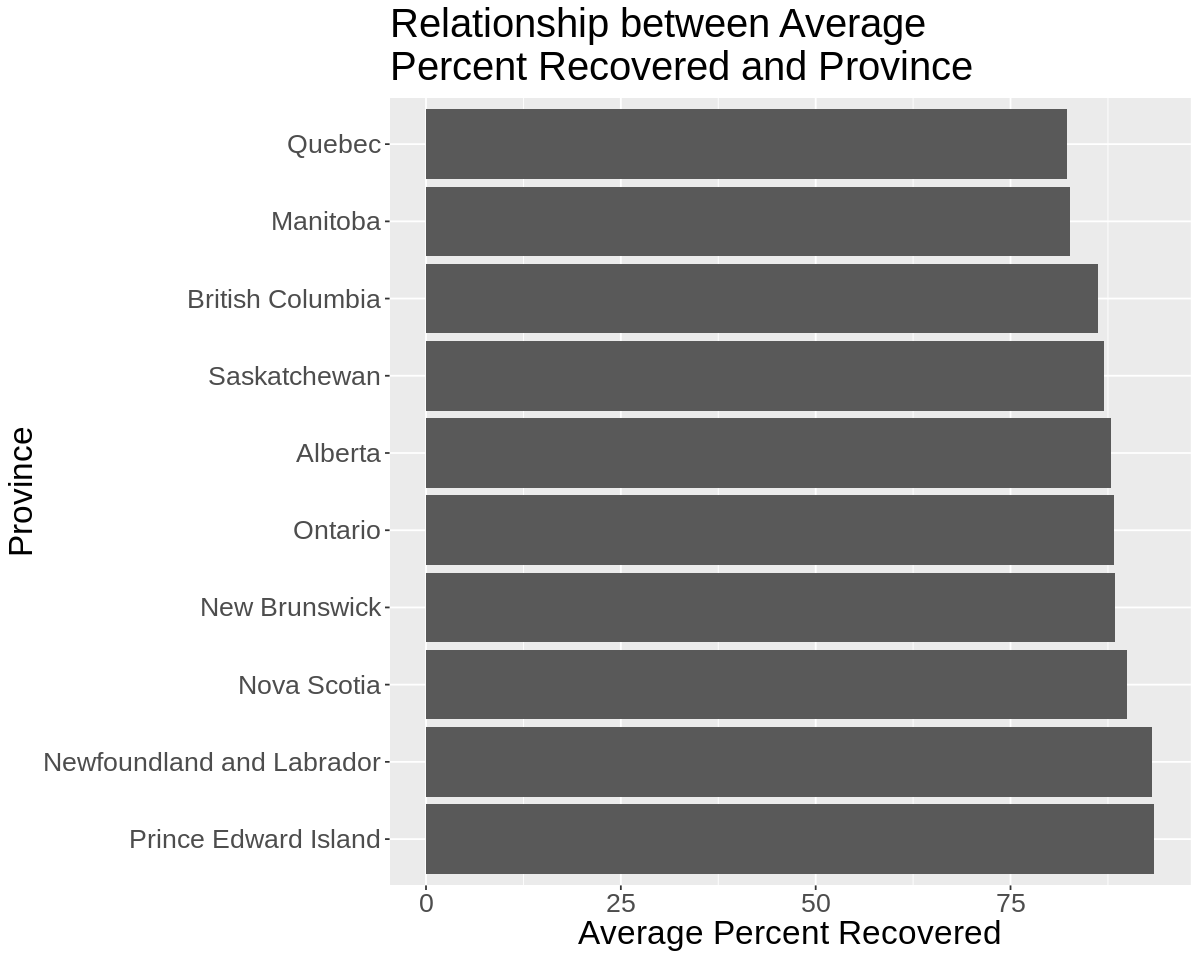

In [13]:
recover_plot <- recover_table |>
                     ggplot(aes(x = fct_reorder(province, mean_percent, .desc = TRUE), y = mean_percent)) +
                     geom_bar(stat = "identity")+
                     labs(x = "Province", y = "Average Percent Recovered", fill = "Province")+
                     theme(text = element_text(size = 20))+
                      coord_flip()+
                     ggtitle("Relationship between Average \nPercent Recovered and Province")
recover_plot

### Methods

For our data analysis, we will split the COVID-19 data (dating from January 31, 2020, to December 17, 2021) into a testing and training set. Next, we will use the number confirmed and percent recovered to train our data to predict which province the data is describing. 

As stated in the introduction, difference in provice/territory population means that the number of people who recover does not carry the same weight between provinces. Therefore, we use percent recovered to account for this variation.

In addition to the data of the total number of confirmed cases, there are other variables which are different for 13 provinces in Canada and we can use them as our classifiers. We choose to cover the percentage of recovery cases for our data analysis.

At the end of the project, we will visualize our results through a scatter plot, plotting the number of confirmed cases against recovery rate, then colouring the data points according to their province label.

### Expected Outcomes and Significance

For this project, we will be building a Knn classification model that predicts province name based on number of confirmed cases and  percentage of recovered cases. We believe that these predictors are a unique feature of each province which is a result of its province demographics, COVID policies and medical system. For example, in our visualization, Prince Edward Island and Newfoundland and Labrador have the same highest recovery rate. We believe that the Maritime provinces (Nova Scotia, Newfoundland and Labrador, PEI, New Brunswick) will have the highest COVID-19 recovery rates because They have a smaller population and likely have a healthcare system that will not be overwhelmed by COVID-19 cases.

At the initial stage of proposing our project, from the relationship between average percent recovered and province, we can observe a difference in recovery rate that varies across provinces. This made us wonder what is contributing to this difference? Province demographics, COVID policies and medical system can all lead to the kind of differences between provinces that is displayed in a relationship like recovery rate. More specifically, population density, mask mandate and tester kit provision could contribute to the total number of confirmed cases in a particular province. On the other hand, the efficiency and capacity of the medical system can lead to differences in average percent recovered across provinces.

We could gain a grasp of whether or not our speculation of “characteristic of province effect covid conditions of that province” is correct if we can make accurate predictions (classify) a province based on covid conditions variables; In particular number of confirmed cases and  percentage of recovered cases. Our study can allow us to gain a grasp on whether or not the COVID situation in each province is uniquely related to its various demographical, political and infrastructural features that can help future studies to extend on which area to focus more when handling COVID-19 and identify the provinces that need more support or response strategies.


Future questions:

1. Why does Prince Edward Island and Newfoundland and Labrador have the highest recovery rate? (derive a casual relationship)
2. Does the recovery rate relate to other categorical variables that show a considerable difference between the province with highest recovery rate and others? 
3. Can the successes of such two provinces be adapted to help improve the recovery rates of other provinces given that demographic and medical system differences exist between different provinces?
4. How can we make a decision about what percent of weight does every predictor account for?


### Data Analysis

In [14]:
covid_train

province,numconf,percentrecover
<fct>,<dbl>,<dbl>
British Columbia,725,25.66
Manitoba,11,2.78
Ontario,858,0.93
Nova Scotia,73,2.74
Prince Edward Island,9,11.11
British Columbia,725,25.66
Alberta,542,4.98
⋮,⋮,⋮
Saskatchewan,82069,98.18


In order to train our model with knn algorithm, We need a value for the number of neighbors that we choose to preform each prediction. The best way to find the suitable k value, we will preform cross validation.

In [15]:
set.seed(100)
# Preforming 5 fold cross validation to find the best value for k
covid_train_vfold <- vfold_cv(covid_train, v= 5, strata= province)

# Model specification
knn_spec <- nearest_neighbor(weight_func= "rectangular", neighbors= tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# Recipe for setting province as target variable and all others as predictors;
# Standardize the predictors
covid_recipe <- recipe(province ~ ., data= covid_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Evaluate the model for 10 values of k
k_vals <- tibble(neighbors = seq(from = 2, to = 10, by = 1))

knn_fit <- workflow() |>
    add_recipe(covid_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples= covid_train_vfold, grid= k_vals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")
knn_fit

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.7864353,5,0.008962069,Preprocessor1_Model1
3,accuracy,multiclass,0.7610651,5,0.007096030,Preprocessor1_Model2
4,accuracy,multiclass,0.7531221,5,0.006511354,Preprocessor1_Model3
5,accuracy,multiclass,0.7385069,5,0.006124237,Preprocessor1_Model4
6,accuracy,multiclass,0.7324759,5,0.005871256,Preprocessor1_Model5
7,accuracy,multiclass,0.7156922,5,0.007435047,Preprocessor1_Model6
8,accuracy,multiclass,0.7113943,5,0.008719286,Preprocessor1_Model7
9,accuracy,multiclass,0.7075273,5,0.006329021,Preprocessor1_Model8
10,accuracy,multiclass,0.7068800,5,0.006247328,Preprocessor1_Model9


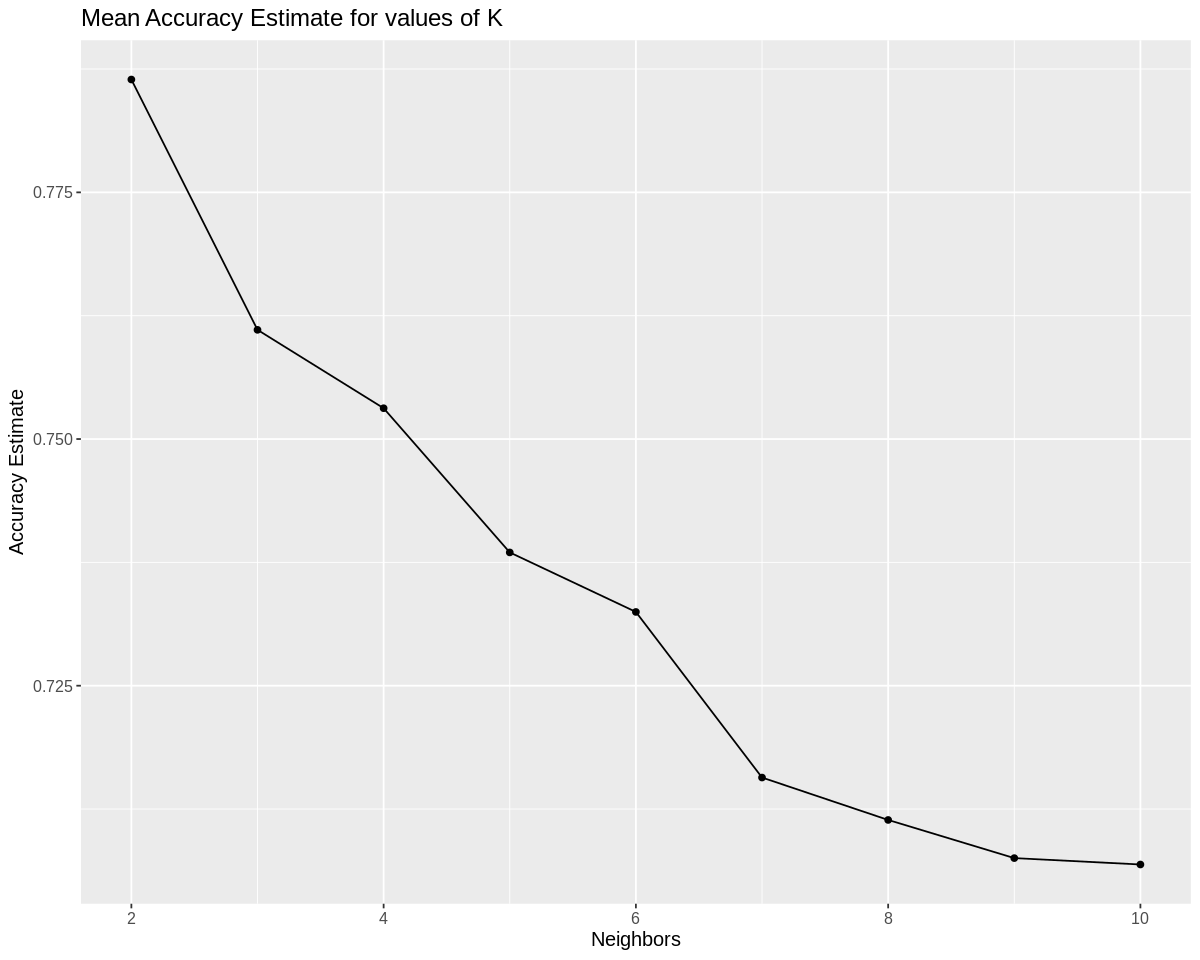

In [16]:
# Plot mean accuracies for values of k
accuracy_vs_k <- ggplot(knn_fit, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  ggtitle("Mean Accuracy Estimate for values of K") +
  theme(text = element_text(size = 12))

accuracy_vs_k

##### We think we would be good with just k = 2 since our data is already in a "line plot" so it makes sense that our model is more inaccurate with the more neighbours we choose (in previous worksheets, we were analyzing data that was more scattered which is why the number of neighbours was larger). Also choosing k = 2 is not computationally taxing.

In [17]:
# Choosing the best k based on accuracy plot
best_k <- 2

# Model specification
covid_spec <- nearest_neighbor(weight_func= "rectangular", neighbors= best_k) |>
    set_engine("kknn") |>
    set_mode("classification")

# Combine model specification and recipe in a workflow and build the classifier
covid_fit <- workflow() |>
    add_recipe(covid_recipe) |>
    add_model(covid_spec) |>
    fit(data= covid_train)

# Predict province using test data
class_prediction <- covid_fit |>
    predict(covid_test) |>
    bind_cols(covid_test)
class_prediction

# Compute the accuracy 
classifier_accuracy <- class_prediction |>
    metrics(truth= province, estimate= .pred_class) |>
    filter(.metric == "accuracy") |>
    select(.estimate)
classifier_accuracy

# Confusion matrix
confusion_matrix <- class_prediction |>
    conf_mat(truth= province, estimate= .pred_class)
confusion_matrix

.pred_class,province,numconf,percentrecover
<fct>,<fct>,<dbl>,<dbl>
Newfoundland and Labrador,Alberta,486,5.56
Nova Scotia,Saskatchewan,95,3.16
Ontario,Quebec,1629,0.12
New Brunswick,Saskatchewan,104,2.88
Manitoba,Quebec,2021,1.43
Nova Scotia,New Brunswick,45,2.22
Prince Edward Island,Prince Edward Island,11,9.09
⋮,⋮,⋮,⋮
British Columbia,British Columbia,224998,97.16


.estimate
<dbl>
0.8032258


                           Truth
Prediction                  Alberta British Columbia Manitoba New Brunswick
  Alberta                       126                2        2             1
  British Columbia                7              125        3             3
  Manitoba                        3                3      107            13
  New Brunswick                   5                4        3           111
  Newfoundland and Labrador       1                0       12            20
  Nova Scotia                     1                1        2            10
  Ontario                         2                0        4             0
  Prince Edward Island            0                0        5            18
  Quebec                          2                0        0             0
  Saskatchewan                    2                5        6            12
                           Truth
Prediction                  Newfoundland and Labrador Nova Scotia Ontario
  Alberta               

### Discussion (NOT FINISHED)

Through our initial exploratory analysis, we found that Prince Edward Island had the highest average percent recovery rate while Quebec had the lowest. However, through our classification, we found that the model predicted that later in the pandemic, the Maritime provinces (New Bruinswick, PEI, Nova Scotia, and Newfoundland and Labrador) had lower recovery rates than the mainland provinces. This means that despite having an overall higher average recovery rate, these smaller provinces struggled later on in the pandemic.

This result is contradictory to what we believed would happen. PEI and the Maritime provinces had the highest overall recovery rate while the larger provinces lagged behind. These findings can indicate that the smaller, maritime provinces did well during the beginning or middle of the pandemic, but something occurred which brought their recovery rate down. Further analysis can be completed to determine what caused this change and how to best act during a pandemic so that recovery rates are maximized.

[WROD COUNT: 158]


### KNN regression

#### We want to predict the percent of recovery by using the data of number of confirmed on certian day.
##### Firstly, we create a recipe for preprocessing our data and a model specification for K-nearest neighbors regression. Then, we use different metrics for tuning. Next, we create a 5-fold cross-validation object. Also, we run cross-validation for a grid of numbers of neighbors ranging from 1 to 300 by a step of 3, and then we tund the model and return the RMSPE for each number of k-neighbors, which is the covid_results. Finally, we visualizes how the RMSPE varies with the umber of different neighbors K and use the minimum of RMSPE to find the best setting for the number of neighbors.

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
15,rmse,standard,13.81149,5,0.3208049,Preprocessor1_Model08


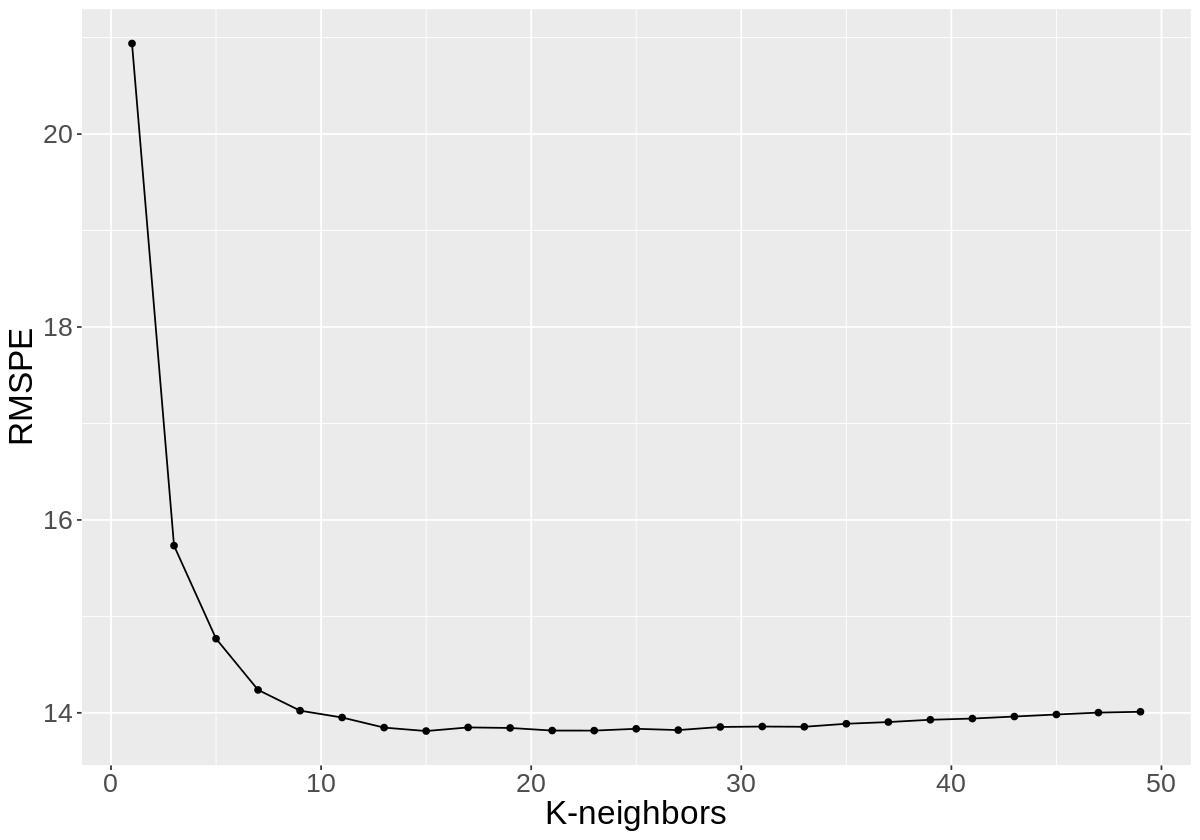

In [20]:
covid_recipe <- recipe(percentrecover ~ numconf, data = covid_train) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())
covid_spec_1 <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = tune()) |>
                                set_engine("kknn") |>
                                set_mode("regression")

covid_vfold <- vfold_cv(covid_train, v = 5, strata = percentrecover)


covid_wkflw <- workflow() |>
add_recipe(covid_recipe) |>
add_model(covid_spec_1)

covid_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 2))

covid_results <- covid_wkflw |>
                tune_grid(resamples = covid_vfold, grid = covid_vals) |>
                collect_metrics() |>
                filter(.metric == "rmse")

options(repr.plot.width=10, repr.plot.height=7)

visualization_for_choosing_k <- covid_results|>
                    ggplot(aes(x = neighbors, y = mean))+
                    geom_point()+
                    geom_line() +
                    xlab('K-neighbors')+
                    ylab('RMSPE')+
                      theme(text = element_text(size=20))
visualization_for_choosing_k
covid_min <- covid_results |>
            filter(mean == min(mean))
covid_min 


##### The smallest RMSPE occurs when K is equal to 15.
##### Then we need to use k = 15 to test our covid_train data set.

In [21]:
regr_recipe <- recipe(percentrecover ~ numconf, data = covid_train) |>
                step_scale(all_predictors()) |>
step_center(all_predictors())
regr_spec <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = 15) |>
set_engine("kknn") |>
set_mode("regression")

regr_vfold <- vfold_cv(covid_train, v = 5, strata = percentrecover)

regr_wkflw <- workflow() |>
add_recipe(regr_recipe) |>
add_model(regr_spec)

regr_fit <- regr_wkflw |>
fit(data = covid_train)

regr_summary <- regr_fit |>
predict(covid_test)|>
bind_cols(covid_test)|>
metrics(truth = percentrecover, estimate = .pred)|>
filter(.metric == 'rmse')

regr_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,13.25914


### Reference

1. Canada, P. H. A. of. (2020, May 31). Covid-19 epidemiology update. Canada.ca. Retrieved November 30, 2022, from https://health-infobase.canada.ca/covid-19/?redir=1#tiles 
This website is updated by everyday, but we just took the data from date of January 31st, 2020 to December 17th, 2021.

2. Centers for Disease Control and Prevention. (n.d.). Symptoms of COVID-19. Centers for Disease Control and Prevention. Retrieved November 30, 2022, from https://www.cdc.gov/coronavirus/2019-ncov/symptoms-testing/symptoms.html 
We know several symptoms of COVID-19.

3. Timbers, T., Campbell, T., &amp; Lee, M. (2022). Data Science a first introduction. CRC Press, Taylor &amp; Francis Group. 
Some code gets from our textbook.